In [1]:
import sys
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('../data/cleaned/cyber_user_profiles.csv')
df.head()

user_id     screen_name                  name                 location  \
0   363675945    robahusseini  Roba El Husseini ربى                  Lebanon   
1  2546033492  hashemosseiran       Hashem Osseiran                   Beirut   
2   179178993     liveanthony      Anthony Galloway             New York, NY   
3  1325420790      elisekapnm          Elise Kaplan  Albuquerque, New Mexico   
4  3311286493      adam_tooze            Adam Tooze             New York, NY   

                                    user_description  user_friends_n  \
0  Journalist @AFP covering Syria and Lebanon. Tw...            1244   
1  Beirut-based @AFP journalist | Views my own | ...            1678   
2  2x @TeamUSA triathlete | Global Head of Video ...             454   
3  Bearer of bad news / criminal justice reporter...             741   
4  History, economics, politics, climate. Columbi...            4931   

   user_followers_n      prof_created_at  favourites_count  verified  \
0              2567  2011-08-28 14:13:43               649     False   
1              2003  2014-06-04 12:41:32               493     False   
2              2303  2010-08-16 18:06:32              3920      True   
3              1566  2013-04-03 21:07:55              3552     False   
4             95042  2015-08-10 07:35:58              6969     False   

   statuses_count  
0            1838  
1            2381  
2            2249  
3            3074  
4           36633

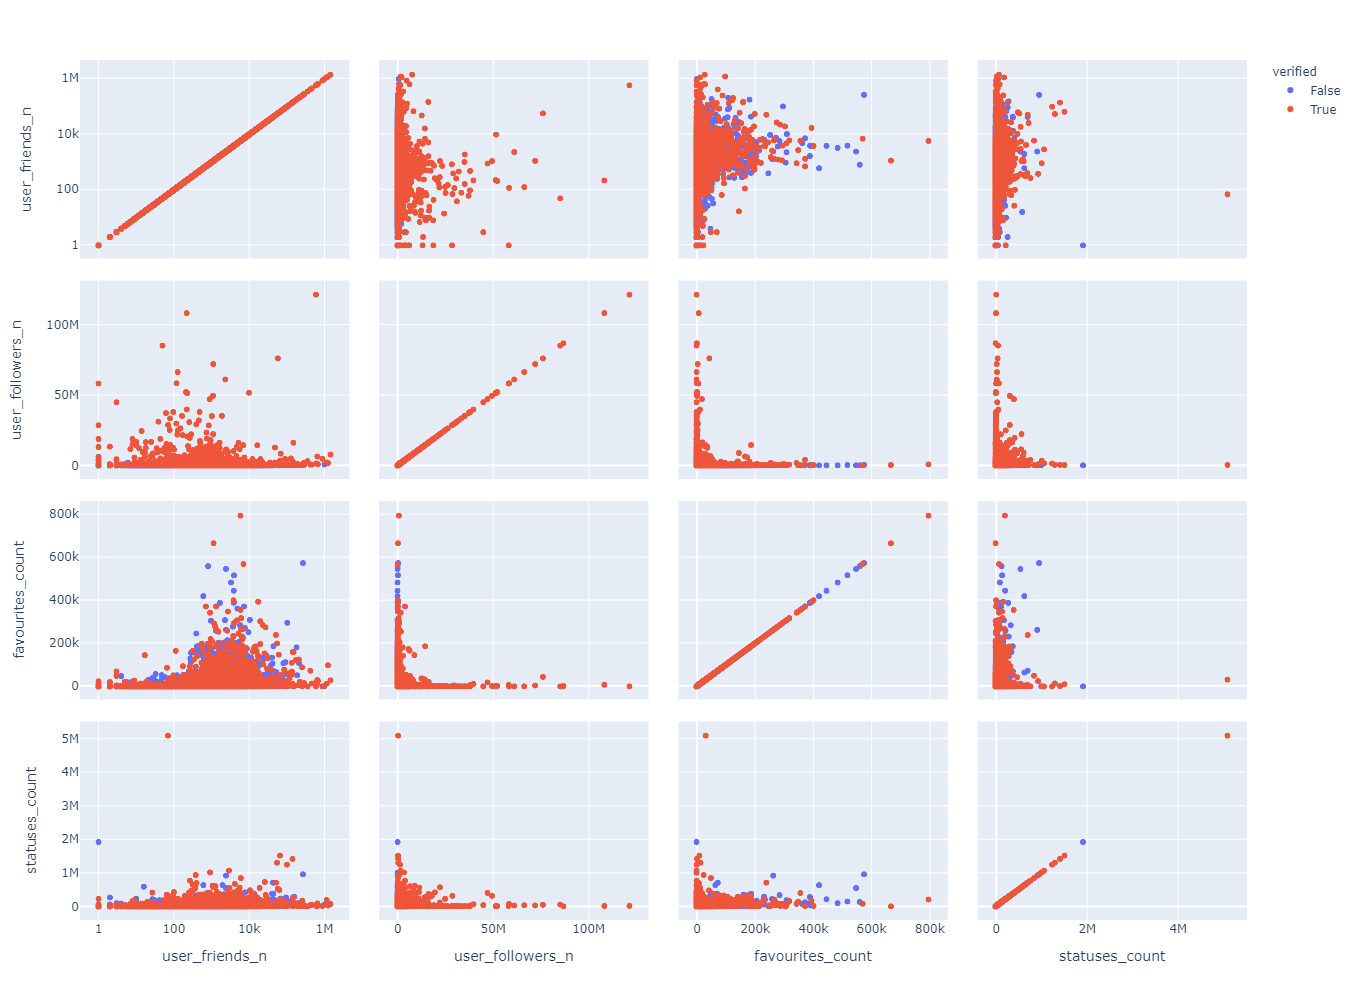

In [8]:
fig = px.scatter_matrix(df, 
                        dimensions=["user_friends_n", "user_followers_n", "favourites_count", "statuses_count"], 
                        color="verified", 
                        hover_name="screen_name",
                        height=1000)
fig.update_layout(xaxis_type="log", yaxis_type="log")
fig.show()

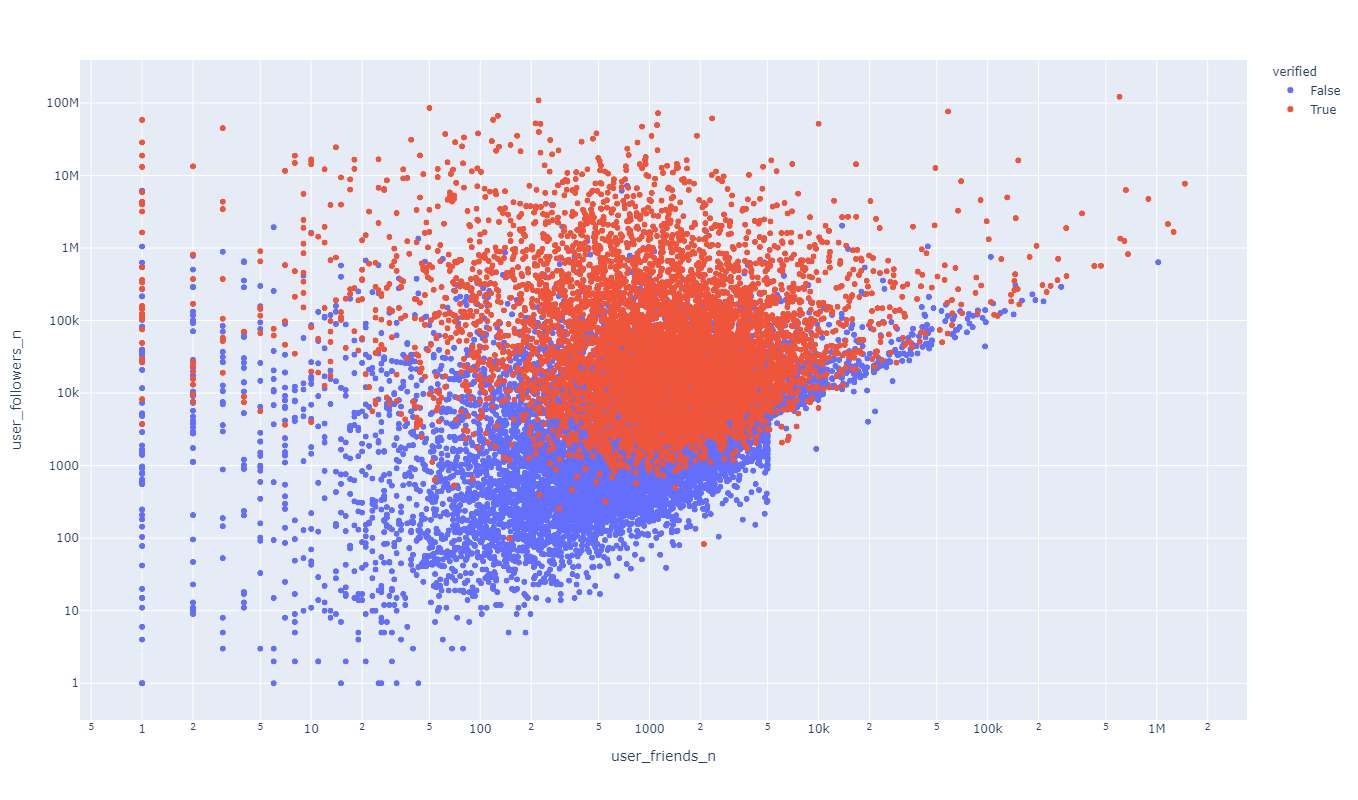

In [7]:
fig = px.scatter(df, 
                        x="user_friends_n",
                         y="user_followers_n", 
                        color="verified", 
                        hover_name="screen_name",
                        height=800,
                        width=900)
fig.update_layout(xaxis_type="log", yaxis_type="log")
fig.show()

In [21]:
import plotly.graph_objects as go

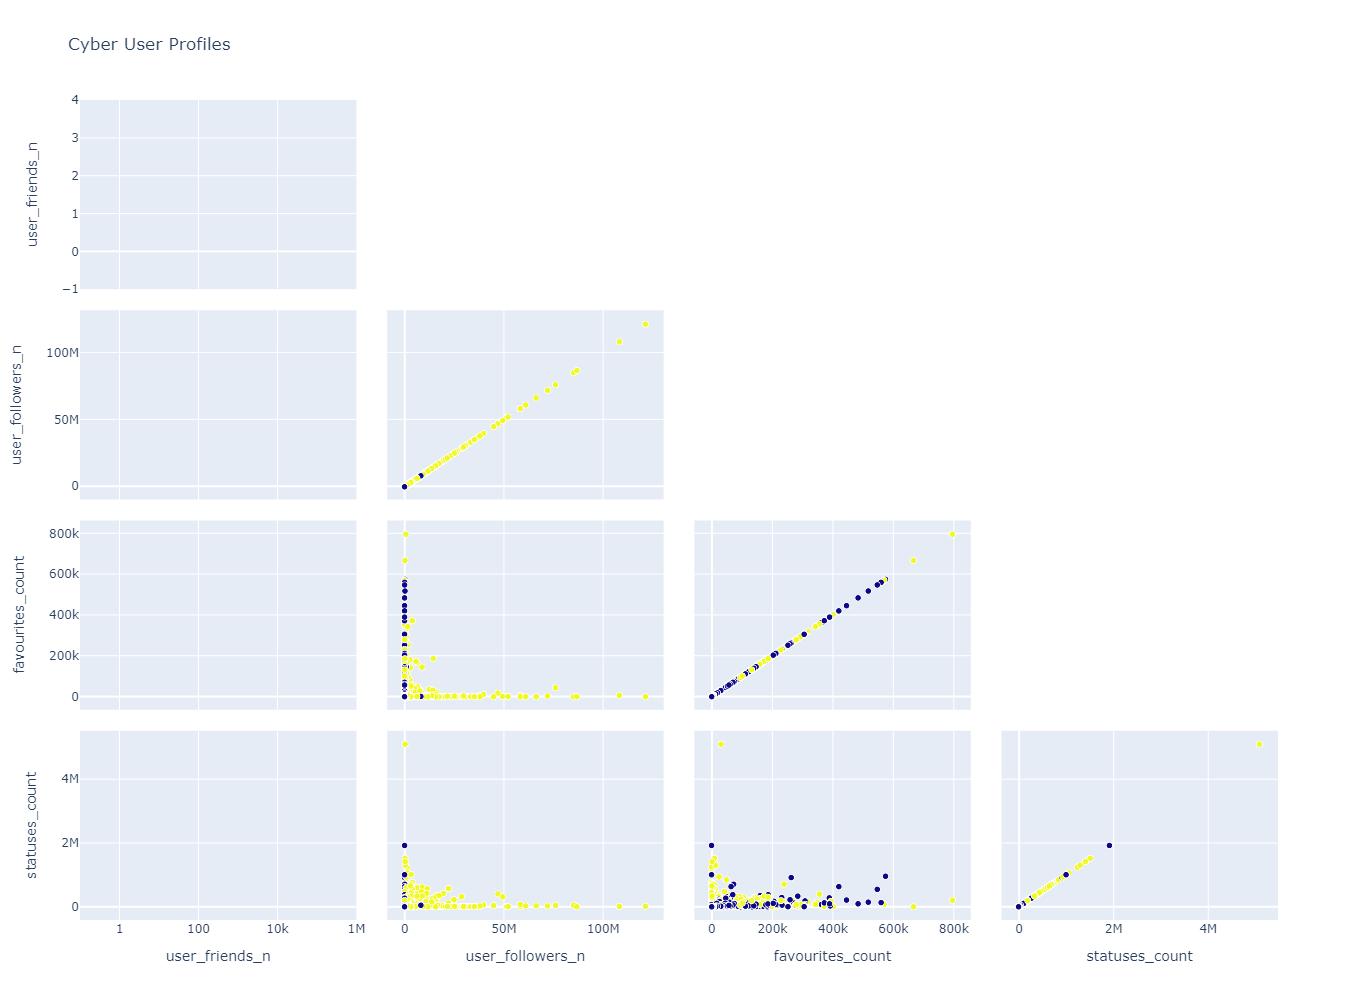

In [32]:
fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='user_friends_n',
                                 values=df['user_friends_n']),
                            dict(label='user_followers_n',
                                 values=df['user_followers_n']),
                            dict(label='favourites_count',
                                 values=df['favourites_count']),
                            dict(label='statuses_count',
                                 values=df['statuses_count'])],
                showupperhalf=False, # remove plots on diagonal
                text=df['screen_name'],
                marker=dict(color=df['verified'].astype('category').cat.codes,
                            showscale=False, # colors encode categorical variables
                            line_color='white', line_width=0.5),
                ))


fig.update_layout(
    title='Cyber User Profiles',
    width=1000,
    height=1000,
    xaxis_type='log'
)

fig.show()